In [1]:
from tools import *
from strategies import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

Testing RatioAnalysis Strategy using Gold as a Reference

In [2]:
#Specify both a time period and an interval to scrape data from Yahoo Finance
timeperiod = "1y"
interval = "1d"

reference = pull_symbol("GC=F", timeperiod, interval)
comparison = ["SI=F", "BZ=F", "B0=F", "ZC=F", "ZO=F","PL=F","HG=F","PA=F", "CL=F", "NG=F",
             "ZS=F", "CC=F", "KC=F"]
symbolhistory = []
commodityname = []
ratio = []

Pulling Information on the Symbol GC=F/n


In [3]:
for commoditity in comparison:
    symbolhistory.append(pull_symbol(commoditity, timeperiod, interval))

Pulling Information on the Symbol SI=F/n
Pulling Information on the Symbol BZ=F/n
Pulling Information on the Symbol B0=F/n
Pulling Information on the Symbol ZC=F/n
Pulling Information on the Symbol ZO=F/n
Pulling Information on the Symbol PL=F/n
Pulling Information on the Symbol HG=F/n
Pulling Information on the Symbol PA=F/n
Pulling Information on the Symbol CL=F/n
Pulling Information on the Symbol NG=F/n
Pulling Information on the Symbol ZS=F/n
Pulling Information on the Symbol CC=F/n
Pulling Information on the Symbol KC=F/n


In [4]:
for i in range(len(symbolhistory)):
    ratio.append(start_ratio(reference, symbolhistory[i]))

In [5]:
print(symbolhistory[1])

                 Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2020-08-24  44.419998  45.169998  44.279999  45.130001   21033          0   
2020-08-25  44.990002  46.040001  44.990002  45.860001   23808          0   
2020-08-26  45.980000  46.090000  45.549999  45.639999   16657          0   
2020-08-27  45.619999  45.820000  44.560001  45.090000   10776          0   
2020-08-28  45.049999  45.290001  44.820000  45.049999     620          0   
...               ...        ...        ...        ...     ...        ...   
2021-08-16  70.220001  70.400002  68.139999  69.510002   33537          0   
2021-08-17  69.650002  70.010002  68.820000  69.029999   29163          0   
2021-08-18  69.010002  70.040001  67.220001  68.230003   34264          0   
2021-08-19  67.419998  67.650002  65.559998  66.449997   35816          0   
2021-08-20  66.599998  66.919998  64.800003  64.980003   25633          0   

In [6]:
print(ratio)

[-0.1163847571867738, 0.4343495404246722, 0.001655608214127754, 1.4151473145382454, 8.241533755833139, -2.3966048235782744, 0.023504994775487998, -9.104364295576861, 0.40806138048931284, 0.05577658548932788, 0.9282807780254809, 7.136635532505675, 2.760201946914245]


In [7]:
for symbol in comparison:
    commodityname.append(pull_symbol_name(symbol))

In [8]:
print(commodityname)

['Silver Sep 21', 'Brent Crude Oil Last Day Financ', 'Mont Belvieu LDH Propane (OPIS)', 'Corn Futures,Dec-2021', 'Oat Futures,Dec-2021', 'Platinum Oct 21', 'Copper Sep 21', 'Palladium Sep 21', 'Crude Oil Sep 21', 'Natural Gas Sep 21', 'Soybean Futures,Nov-2021', 'Cocoa Dec 21', 'Coffee Dec 21']


In [9]:
d = {'Name:':commodityname,'Current Ratio Score': ratio}

In [10]:
df = pd.DataFrame(d)
print(df)

                              Name:  Current Ratio Score
0                     Silver Sep 21            -0.081901
1   Brent Crude Oil Last Day Financ             0.704018
2   Mont Belvieu LDH Propane (OPIS)             0.001498
3             Corn Futures,Dec-2021             3.094366
4              Oat Futures,Dec-2021             8.752376
5                   Platinum Oct 21            -2.297312
6                     Copper Sep 21             0.025563
7                  Palladium Sep 21             2.119238
8                  Crude Oil Sep 21             0.708299
9                Natural Gas Sep 21             0.057602
10         Soybean Futures,Nov-2021             4.776380
11                     Cocoa Dec 21            13.309356
12                    Coffee Dec 21             2.907760


Demonstrate the use of Relative Strength Metrics by calculating using a 14 Day Period

In [11]:
relative_strength(reference, 14)

Date
2020-09-08    0.193522
2020-09-09    0.237448
2020-09-10    0.275858
2020-09-11    0.257472
2020-09-14    0.324434
                ...   
2021-08-12    0.587383
2021-08-13    0.857778
2021-08-16    0.987817
2021-08-17    0.965852
2021-08-18    1.023827
Name: Close, Length: 237, dtype: float64

In [12]:
testrsi = relative_strength_index(reference, 14)

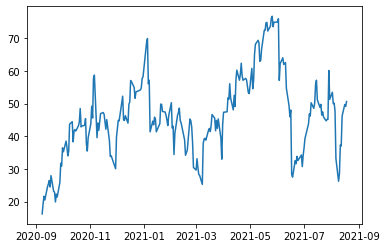

In [13]:
plt.plot(testrsi)

Now Demonstrate Building a Portfolio

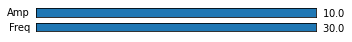

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


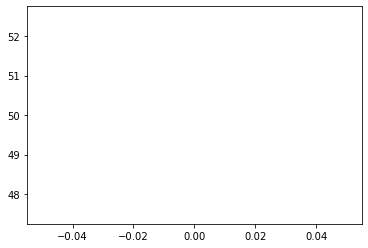

interactive(children=(IntSlider(value=50, description='gold_amount'), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=50, description='silver_amount'), Output()), _dom_classes=('widget-inter…

In [49]:
!jupyter nbextension enable --py widgetsnbextension
rsisilver_var = 50
rsigold_var = 50
x, = plt.plot(50)
@interact(gold_amount=(0, 100))
def double_number(gold_amount):
    rsigold_var = relative_strength_index(reference * gold_amount, 14)
    average_rsi = (rsigold_var+rsisilver_var)/2
    x.set_data(average_rsi)
@interact(silver_amount=(0, 100))
def double_number(silver_amount):
    rsisilver_var = relative_strength_index(symbolhistory[0] * silver_amount, 14)
    average_rsi = (rsigold_var+rsisilver_var)/2

Testing Implementation to Visualise Volatility of the Sectors